In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time
import SimpleITK as sitk

import tensorflow as tf
from tensorflow import keras

In [3]:
candidates_file = r'C:\Users\user\Downloads\pfa\CSVFILES\candidates_V2.csv'
candidates_table = pd.read_csv(candidates_file)

annotations_file = r'C:\Users\user\Downloads\pfa\CSVFILES\annotations.csv'
annotations_table = pd.read_csv(annotations_file)

In [4]:
def get_voxel(self,x,y,z):
        #Converts Cartesian to voxel coordinates        
        origin = self.GetOrigin()
        resolution = self.GetSpacing()
        xx=(x-origin[0])/resolution[0]
        yy=(y-origin[1])/resolution[1]
        zz=(z-origin[2])/resolution[2]
        return (xx,yy,zz)

In [5]:
def crop_class1():
    #return crop images class 1
    class1=[]

    for index, row in annotations_table.iterrows() :
            img_id=row['seriesuid']
            img_ITK=sitk.ReadImage('C:/Users/user/Downloads/pfa/dataset/'+ img_id + '.mhd' )
            img_np= sitk.GetArrayFromImage(img_ITK)
            x=row['coordX']
            y=row['coordY']
            z=row['coordZ']
            (xx,yy,zz)=get_voxel(img_ITK,x,y,z)
            xx=int(xx)
            yy=int(yy)
            zz=int(zz)
            x_min=xx-16
            x_max=xx+16
            y_min=yy-16
            y_max=yy+16
            image=img_np[zz]
            img_crop = image[y_min:y_max, x_min:x_max]
            class1=class1+[img_crop]
            #print(index)
            time.sleep(0.05)

        
    print('Done for all!')
    return(class1) 
    

In [6]:
class1=crop_class1()
print(str(len(class1)))

KeyboardInterrupt: 

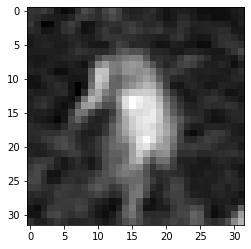

In [6]:
plt.imshow(class1[20])
plt.axis("on")
plt.gray()
plt.show()

In [11]:
def crop_class0(i):
    #return crop images class 0
    class0=[]
    
    for index, row in candidates_table.iterrows() :
       i=index
       if i<30 :
            if row['class']==0 :
                img_id=row['seriesuid']
                img_ITK=sitk.ReadImage('C:/Users/user/Downloads/pfa/dataset/'+ img_id + '.mhd', sitk.sitkFloat32)
                img_np= sitk.GetArrayFromImage(img_ITK)
                x=row['coordX']
                y=row['coordY']
                z=row['coordZ']
                (xx,yy,zz)=get_voxel(img_ITK,x,y,z)
                xx=int(xx)
                yy=int(yy)
                zz=int(zz)
                x_min=xx-16
                x_max=xx+16
                y_min=yy-16
                y_max=yy+16
                image=img_np[zz]
                img_crop = image[y_min:y_max, x_min:x_max]
                class0=class0+[img_crop]

        
    print('Done for all!')
    return(class0) 
    

In [8]:
class0=crop_class0(30)
print(str(len(class0)))

Done for all!
30


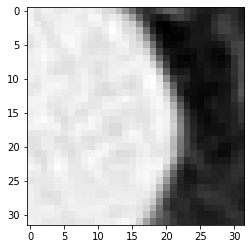

In [9]:
plt.imshow(class0[5])
plt.axis("on")
plt.gray()
plt.show()